## Compare Simple LR Model & Multiple LR for Sales Prediction 


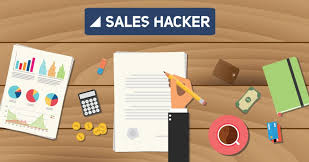

### Simple Linear Regression 

First building a Simple linear regression model to predict Sales using an appropriate predictor variable.

Steps: 

1. Importing data using the pandas library
2. Understanding the structure of the data
3. Training the Model
4. Residual Analysis
5. Predict & Evaluate the Model

## Importing Python Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###  Step 1: Reading and Understanding the Data

In [ ]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("/kaggle/input/sales-advertisment/advertising.csv")
advertising.head()

In [ ]:
#inspect the various aspects of our dataframe
advertising.shape

In [ ]:
advertising.info()

In [ ]:
advertising.describe()

## Step 2: Visualising the Data

Visualise the data using seaborn using a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Conclusion**

As seen in the pairplot and the heatmap, the variable  TV   seems to be most correlated with  Sales . So let's go ahead and perform simple linear regression using TV as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [ ]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

Split  into training and testing sets by importing `train_test_split` from the `sklearn.model_selection` library. Generally, a good practice to keep 70% of the data as train dataset and the rest 30% as test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Let's now take a look at the train dataset

X_train.head()

In [ ]:
y_train.head()

##  Step 3b : Building a Linear Model

import the `statsmodel.api` library to apply  linear regression on  the data.

**About Statsmodel Library**

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we have to manually add intercept using the `add_constant` attribute of `statsmodels`. After adding the constant to `X_train` dataset, we can fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

#####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.


###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.


---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.9487 + 0.0545 \times TV $

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.0545*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference


#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**Conclusion**

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

In [ ]:
plt.scatter(X_train,res)
plt.show()

**Conclusion**

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.


The regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that we have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data l did for `X_train` and then simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

###### Checking the R-squared on the test set

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

##### Visualizing the fit on the test set

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. Use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again. 

When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.


1. Create an object of LInearRegression
2. Fit the model
3. see params , make predictions
4. evaluate

In [ ]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train_lm.shape

In [ ]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [ ]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

## Final Result

The equation we get is the same as what we got before!

$ Sales = 6.948 + 0.0545* TV $


Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

# Multiple Linear Regression
## Predicting Sales based on various advertisment factors 

 
STEPS

Step 1: Reading and Understanding the Data

Step 2: Preparing the Data for modelling(Prepocessing)

Step 3. Training the Model

Step 4. Residual Analysis

Step 5. Predict & Evaluate the Model

In [ ]:
sns.pairplot(advertising)
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(y= advertising['TV'],   palette="Set1"   )
plt.subplot(2,2,2)
sns.boxplot(y = advertising['Radio'],   palette="Set2" )
plt.subplot(2,2,3)
sns.boxplot(y= advertising['Newspaper'],   palette="Set3" )
plt.subplot(2,2,4)
sns.boxplot(y= advertising['Sales'],  palette="Set1")
plt.show()

sns.boxplot(data=advertising.iloc[:,0:4])
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(advertising, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In the above demonstration for Simple Linear Regression, scaling doesn't impact model. Here we can see that except for `TV`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['TV','Radio','Newspaper','Sales']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (6, 3))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `Sales` seems to the correlated to `TV` the most followed by `Radio` then `Newspaper`

### Model1 - Lets make model with all features included

### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('Sales')
X_train = df_train

In [ ]:
X_train.head()

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train )

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained

lr.params

In [ ]:
# Print a summary of the linear regression model obtained
print(lr.summary())

**Observations**

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**Observations**

We generally want a VIF that is less than 5. But we cant see any variable  that we need to drop. Therefore build second model by dropping Newspaper column as from Heatmap we found it is less correlated with `Sales` and also from p-Value is high for `Newspaper`

## Model 2 

In [ ]:
# Dropping highly correlated variables and insignificant variables

X_train2 = X_train.drop('Newspaper', 1,)
X_train2.head()

In [ ]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train2)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Print the summary of the model
print(lr_2.summary())

**Observation**

We can clearly see no change in R-sq and Adjusted R-sq value

But F-Statistics is high for Model 2 - means Overall fit of model is more `Statistically significant` than the Model 1

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Dropping the Variable and Updating the Model

As you can notice some of the NO variable have high VIF values as well as high p-values. No need to drop any variable now


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_price = lr_2.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. second model.

#### Applying the scaling on the test sets

In [ ]:
df_test.head()

In [ ]:
num_vars = ['TV', 'Radio', 'Sales'  ]

#df_test[num_vars] = scaler.transform(df_test[num_vars])


df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_test.describe()

In [ ]:
#### Dividing into X_test and y_test
y_test = df_test.pop('Sales')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [ ]:
X_test_m4.head()

In [ ]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["Newspaper" ], axis = 1)

In [ ]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
X_test.head()

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
 
plt.show()


We can see that the equation of our best fitted line is:

$ Sales = 0.1127 + 0.6284  \times  TV + 0.2221  \times  Radio   $


## Building Model 2 without Scaling

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(advertising, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
y_train = df_train.pop('Sales')
X_train = df_train
X_train  = X_train.drop('Newspaper', 1,)

In [ ]:
X_train.head()

In [ ]:
# Add a constant
X_train_lm = sm.add_constant(X_train )

In [ ]:
# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
# Check the parameters obtained

lr_3.params

In [ ]:

# Print a summary of the linear regression model obtained
print(lr_3.summary())

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_price = lr_3.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model 3

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [ ]:
# Dividing into X_test and y_test
y_test = df_test.pop('Sales')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [ ]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m3 = X_test_m3.drop(["Newspaper" ], axis = 1)

In [ ]:
# Making predictions using the fourth model

y_pred_m3 = lr_3.predict(X_test_m3)

## Step 9b: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ Sales = 4.4251 + 0.0540  \times  TV + 0.1137  \times  Radio   $


**Final Conclusions:**

1. R-sqaured and Adjusted R-squared - 0.910 and 0.909 - 90% of variance in data is explained by our model.

2. F-stats  - 692.3  means Model fit is  Statistically significant and 90%
variance explained by model is just not by chance.


3. p-values - p-values for all the coefficients is less than the significance level of 0.05. - means that all the predictors are statistically significant.